In [188]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 讀取數據
train = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\無氣提.csv") 

print (train)
train.head(5)



     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  7.03  35.0                     -          NaN                  NaN   
1       1  7.08  35.0                   43%        12.47                  NaN   
2       2  7.22  35.0                   53%        12.47               108.97   
3       3  7.22  35.0                   50%        12.47                  NaN   
4       4  7.24  35.0                   49%        12.47               108.97   
5       5  7.24  35.0                   49%        12.47                  NaN   
6       6  7.25  35.0                   48%        12.47               108.97   
7       7  7.29  35.0                   56%        12.47                  NaN   
8       8  7.29  35.0                   49%        12.47               108.97   
9       9  7.24  35.0                   47%        12.47                  NaN   
10     10  7.25  35.0                   55%        12.47               108.97   
11     11  7.38  35.0       

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,7.03,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4846.0,1477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.08,35.0,43%,12.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,107.0,0.63,251.0
2,2,7.22,35.0,53%,12.47,108.97,16.41,16.41,74.94,31.0,NaN,19.46,60.0,147.0,86.0,120.0,111.0,465.0,3852.0,2500.0,3852.0,2500.0,26.0,26.0,26.0,65.18,108.3,60.37,40.57,67%,44.0,38.0,2.17,0.26,106.0,0.50,202.0
3,3,7.22,35.0,50%,12.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,91.0,0.45,181.0
4,4,7.24,35.0,49%,12.47,108.97,16.41,17.33,61.65,43.0,NaN,16.24,44.0,780.0,231.0,123.0,772.0,1906.0,3796.0,2230.0,3796.0,2230.0,16.0,18.0,18.0,65.18,108.3,47.85,30.82,64%,56.0,53.0,2.17,0.16,66.0,0.33,134.0


In [85]:
test = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\氣提.csv")

print (test)
test.head(5)

     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  6.99  35.0                     -          NaN                  NaN   
1       1  7.30  35.0                   59%        12.47                  NaN   
2       2  7.27  35.0                   63%        12.47               108.97   
3       3  7.28  35.0                   56%        12.47                  NaN   
4       4  7.22  35.0                   59%        12.47               108.97   
5       5  7.25  35.0                   60%        12.47                  NaN   
6       6  7.23  35.0                   51%        12.47               108.97   
7       7  7.25  35.0                   59%        12.47                  NaN   
8       8  7.22  35.0                   51%        12.47               108.97   
9       9  7.38  35.0                    3%        12.47                  NaN   
10     10  7.40  35.0                    0%        12.47               108.97   
11     11  7.36  35.0       

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,6.99,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4846.0,1477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.30,35.0,59%,12.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,149.0,0.63,251.0
2,2,7.27,35.0,63%,12.47,108.97,16.41,13.05,70.66,35.0,20.0,18.34,0.0,1219.0,219.0,193.0,958.0,NaN,4958.0,2332.0,4958.0,2332.0,3.0,9.0,10.0,65.18,108.3,28.02,17.5,62%,74.0,73.0,2.17,0.12,47.0,0.19,74.0
3,3,7.28,35.0,56%,12.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,52.0,0.23,93.0
4,4,7.22,35.0,59%,12.47,108.97,16.41,14.82,58.58,46.0,10.0,15.43,0.0,897.0,188.0,193.0,943.0,2221.0,4734.0,2116.0,4734.0,2116.0,5.0,11.0,10.0,65.18,108.3,29.13,17.8,61%,73.0,73.0,2.17,0.12,47.0,0.20,79.0


In [ ]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [ ]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

In [ ]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [ ]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

In [ ]:
print(train.columns)
print(test.columns)

In [ ]:
pd.set_option('display.max_columns', None)  # 顯示所有列
pd.set_option('display.max_rows', None)  # 顯示所有行
test.describe()

# stats_df = train.describe()
# stats_df.to_excel(r'C:\Users\rex\Desktop\賴老師連續流\part1\無氣提統計.xlsx')

In [ ]:
fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
ax.scatter(x = train['Temp'],y = test['MY'])   #繪製點散圖
plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
plt.xlabel('Temp',fontsize = 13)
plt.show()

In [ ]:
#異常值處理
train = train.drop(train[(train['SCOD(g/L)']>30) & (train['MY']<200)].index)

fig, ax = plt.subplots()
ax.scatter(train['SCOD(g/L)'], train['MY'])
plt.ylabel('SCOD(g/L)',fontsize = 13)   #fontsize = 13 字體大小
plt.xlabel('MY',fontsize = 13)
plt.show()

In [86]:
# ND轉換NA
train = train.replace("ND", pd.NA)
test = test.replace("ND" , pd.NA)

# 將百分比轉換為數值
percentage_cols = ["SCOD removal(%)", "TCOD removal(%)", "C/N ratio", "Hydrolysis(%)", "Acidogensis(%)", "Methanogenesis(%)", "VS/TS(%)", "TS removal(%)", "VS removal(%)", "CH4 concentration (%)"]
for col in percentage_cols:
    # 確保所有值為字串型態
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    # 如果該值包含數字和%，則將 "%" 字符去掉並轉換為浮點數；否則直接轉換為浮點數
    train[col] = train[col].apply(lambda x: float(x.replace("%","")) / 100.0 if "%" in x else float(x) if x.replace(".","").isdigit() else np.nan)
    test[col] = test[col].apply(lambda x: float(x.replace("%","")) / 100.0 if "%" in x else float(x) if x.replace(".","").isdigit() else np.nan)

# # 處理ND值，如果某個特徵有連續20個ND，就刪除該特徵
# features_to_drop = [column for column in train.columns if (train[column] == "ND").rolling(window=10).sum().max() >= 20]
# train = train.drop(columns=features_to_drop)

# 使用前後的值加總除以2進行插值
train = train.interpolate(method="linear")
test = test.interpolate(method="linear")



#看數據維度
print(train.shape)
print(test.shape)


(209, 37)
(209, 37)



mu = 181.35 and sigma = 282.76



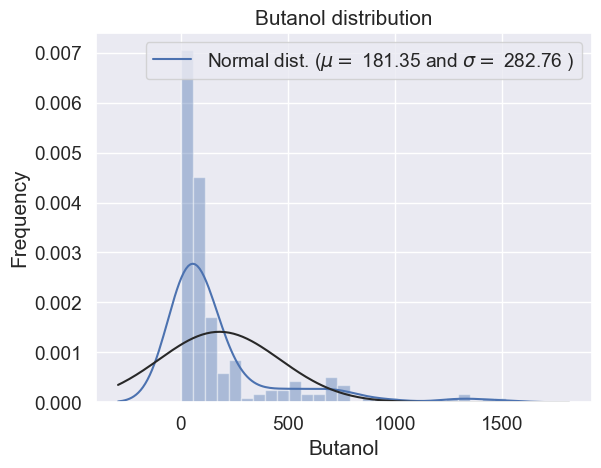

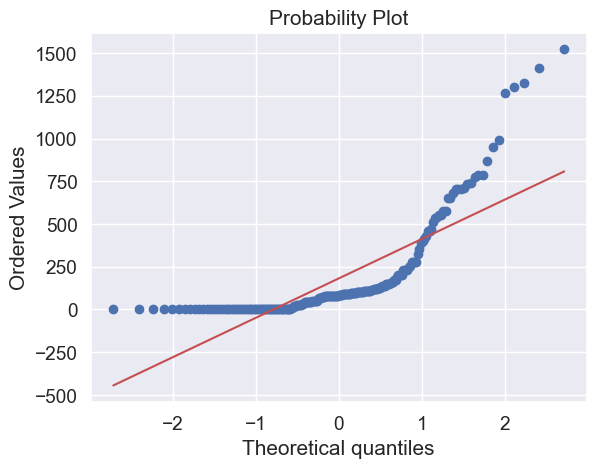

In [87]:
#分析目標變量的分布，計算均值與標準差
sns.distplot(train['Butanol'] , fit=norm);  #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)

(mu, sigma) = norm.fit(train['Butanol'])  #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:態分布的標準差。
print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],  #plt.legend用於給圖標添加圖例，
            loc='best')  #loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
plt.ylabel('Frequency')
plt.title('Butanol distribution')

fig = plt.figure()   #創建一個新的圖形窗口
res = stats.probplot(train['Butanol'], plot=plt)  #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
plt.show()

In [100]:
# # 使用線性插值來填充缺失的值
# train["MY"] = train["MY"].interpolate(method="linear", limit_direction="both")
# test["MY"] = test["MY"].interpolate(method="linear", limit_direction="both")


# train["CH4 concentration (%)"] = train["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")
# test["CH4 concentration (%)"] = test["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")

train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)

train = train.drop([1, 2]).reset_index(drop=True)  
test = test.drop([1, 2]).reset_index(drop=True)  

train = train.interpolate(method="linear", limit_direction="both")
test = test.interpolate(method="linear", limit_direction="both")

In [101]:
# 找到Butanol列中的最低值
butanol_min = train['Butanol'].min()
butanol_min = test['Butanol'].min()

# 將Butanol列中為0的值替換為最低值
train.loc[train['Butanol'] == 0, 'Butanol'] = butanol_min
test.loc[test['Butanol'] == 0, 'Butanol'] = butanol_min

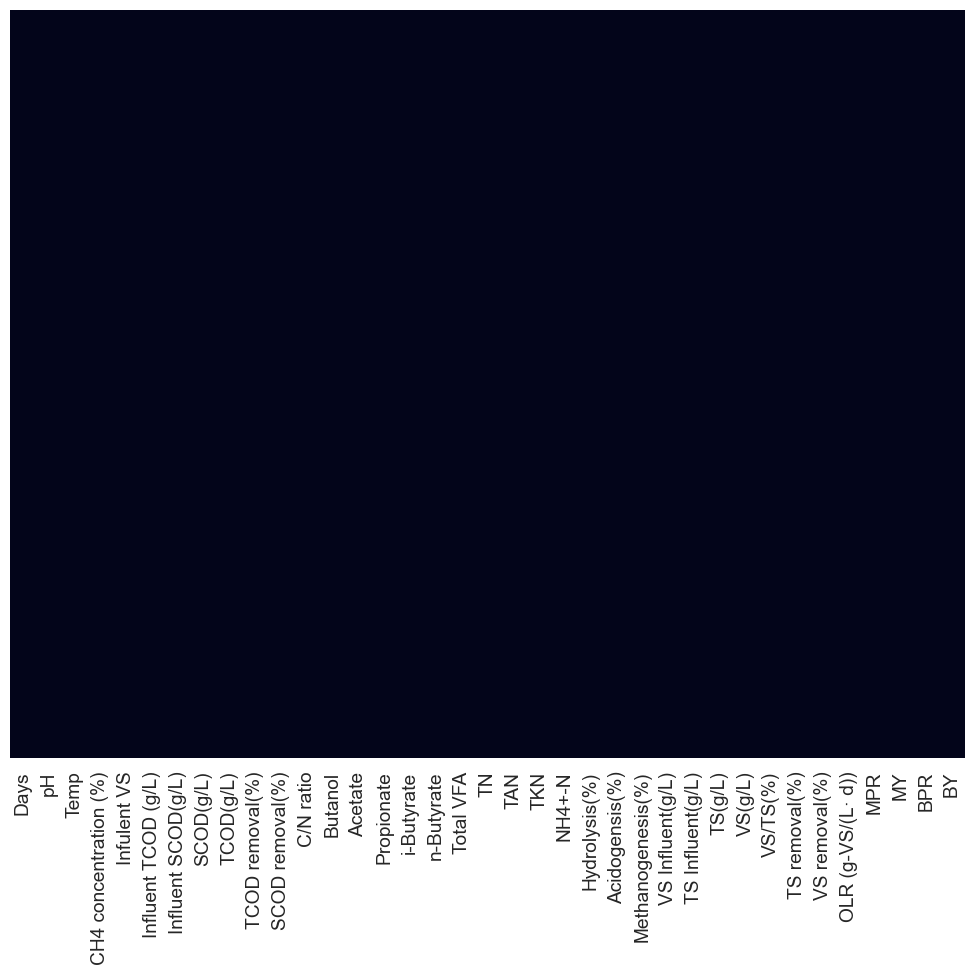

In [102]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [104]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(205, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Days                   205 non-null    int64
 1   pH                     205 non-null    int64
 2   Temp                   205 non-null    int64
 3   CH4 concentration (%)  205 non-null    int64
 4   Infulent VS            205 non-null    int64
 5   Influent TCOD (g/L)    205 non-null    int64
 6   Influent SCOD(g/L)     205 non-null    int64
 7   SCOD(g/L)              205 non-null    int64
 8   TCOD(g/L)              205 non-null    int64
 9   TCOD removal(%)        205 non-null    int64
 10  SCOD removal(%)        205 non-null    int64
 11  C/N ratio              205 non-null    int64
 12  Butanol                205 non-null    int64
 13  Acetate                205 non-null    int64
 14  Propionate             205 non-null    int64
 15  i-Butyrate             205 non

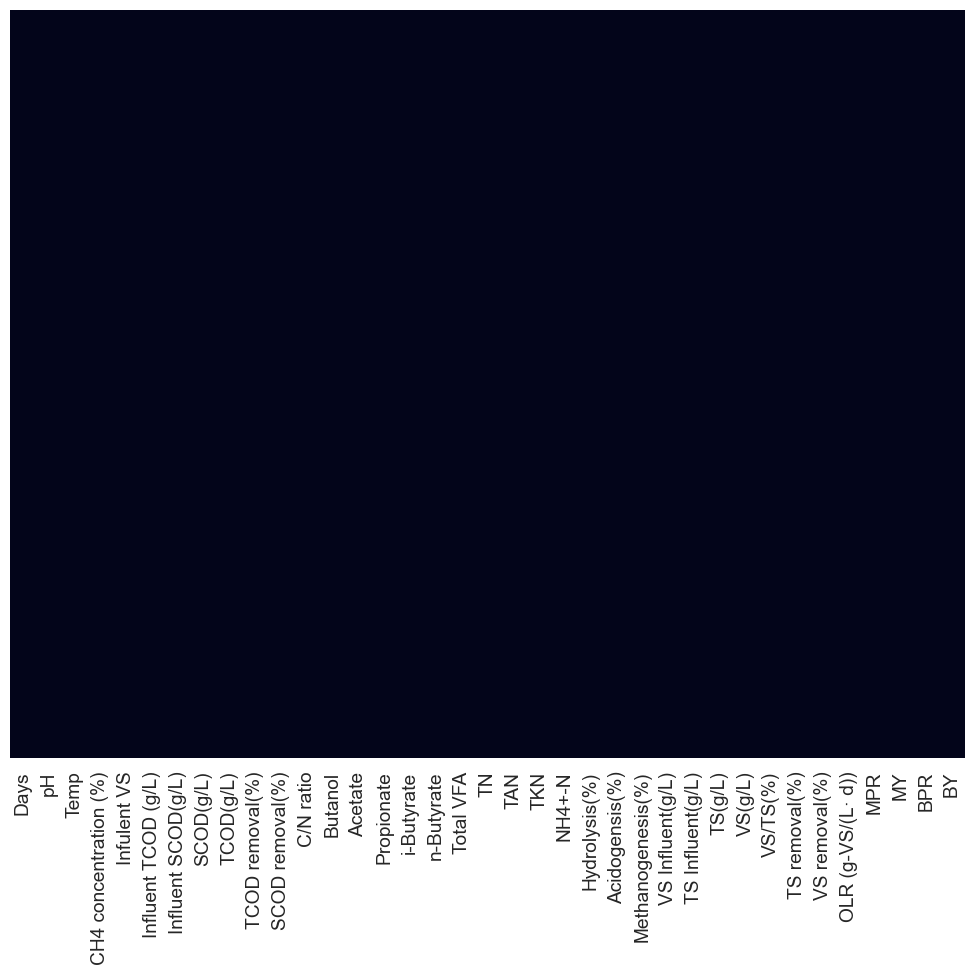

In [92]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [93]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

In [ ]:
# # log對數變換
# train["MPR"] = np.log1p(train["MPR"])  #np.log1p函數將()變量中的所有值都加上1，然後取對數。可以有效的消除數據中的偏度和峰度。使其更接近正態分佈。

# sns.distplot(train["MPR"] , fit=norm); 
 
# (mu, sigma) = norm.fit(train['MPR'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
 
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('SCOD(g/L)')
# plt.title('MPR distribution')
# fig = plt.figure()
# res = stats.probplot(train['MPR'], plot=plt)
# plt.show()

In [94]:
#對分類變量編碼
from sklearn.preprocessing import LabelEncoder
cols = ('Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
                     'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
                     'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
                     'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
                     'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
                     'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
                     'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
                     'MPR', 'MY', 'BPR', 'BY')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))    
 
#查看數據維度        
print('Shape all_data: {}'.format(train.shape))
print('Shape all_data: {}'.format(test.shape))

Shape all_data: (207, 37)
Shape all_data: (207, 37)


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # 定義要進行 One-Hot 編碼的欄位
# columns_to_encode = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#                      'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#                      'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#                      'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#                      'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#                      'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#                      'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
#                      'MPR', 'MY', 'BPR', 'BY']

# # 初始化 One-Hot 編碼器
# encoder = OneHotEncoder()

# encoder = OneHotEncoder(handle_unknown='ignore')

# # 對 train 資料進行 One-Hot 編碼
# train_encoded = encoder.fit_transform(train[columns_to_encode])

# # 對 test 資料進行 One-Hot 編碼
# test_encoded = encoder.transform(test[columns_to_encode])

# # 檢查編碼後的資料維度
# print('編碼後訓練資料的維度:', train_encoded.shape)
# print('編碼後測試資料的維度:', test_encoded.shape)


In [121]:
#轉換成虛擬變數
train_dummy_data = pd.get_dummies(train)
train_dummy_data["SCOD removal(%)"] = train_dummy_data["SCOD removal(%)"].fillna(0)
train_dummy_data.head()



,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,0,4,12,0,4,6,127,176,0,0,180,0,0,0,0,0,0,26,37,76,7,12,7,10,5,9,153,155,38,6,4,5,0,12,12,17
1,3,3,4,11,0,4,6,133,147,8,0,178,4,33,53,75,129,78,14,28,14,29,3,3,3,5,9,119,129,33,15,14,5,2,1,2,2
2,4,4,4,10,0,4,6,134,143,10,0,186,0,27,41,85,125,68,12,26,12,27,0,0,0,5,9,115,121,30,16,16,5,1,0,1,1
3,5,5,4,18,0,4,6,139,159,5,0,185,0,22,45,87,126,62,13,27,13,28,1,1,1,5,9,129,139,33,13,12,5,2,2,0,0
4,6,5,4,11,0,4,6,147,169,2,0,184,0,20,48,94,127,60,14,29,14,30,2,2,2,5,9,145,147,36,10,7,5,2,1,2,3


In [122]:
test_dummy_data = pd.get_dummies(test)
test_dummy_data.head()

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,0,4,28,0,4,6,162,187,0,14,187,0,60,21,102,137,106,94,36,94,15,5,0,1,5,9,15,18,14,47,37,5,0,21,16,17
1,3,4,4,32,0,4,6,161,171,5,16,183,0,44,20,102,133,100,56,28,56,29,4,1,1,5,9,17,17,12,46,37,5,7,16,12,12
2,4,2,4,23,0,4,6,154,154,10,24,186,0,41,31,102,130,97,42,23,42,24,1,0,1,5,9,18,15,11,46,37,5,6,14,13,13
3,5,4,4,31,0,4,6,153,169,6,25,185,0,42,23,96,126,88,36,25,36,26,2,0,1,5,9,20,20,12,42,33,5,7,15,12,11
4,6,1,4,23,0,4,6,151,175,3,26,184,0,43,15,92,125,82,26,27,26,28,3,0,1,5,9,21,21,13,40,30,5,7,15,14,14


In [ ]:
p_values = []

# 只針對數值型欄位進行操作
for column in train.select_dtypes(include=[np.number]).columns:  
    # 處理NaN值
    train_col = train[column].dropna()
    test_col = test[column].dropna()
    
    # 檢查是否有足夠的樣本
    if len(train_col) < 2 or len(test_col) < 2:
        print(f"欄位 {column} 的數據不足以進行 t 檢定")
        continue
    
    # 使用t檢定比較每個變數
    t_stat, p_val = stats.ttest_ind(train_col, test_col)
    p_values.append(p_val)

# 使用 Bonferroni 方法進行多重比較校正
alpha = 0.05  # 顯著性水平
n_tests = len(p_values)
p_values_corrected = np.array(p_values) * n_tests  # 進行校正

# 打印每個變數及其經過校正的 p 值
for column, p_val in zip(train.select_dtypes(include=[np.number]).columns, p_values_corrected):
    is_significant = p_val < alpha  # 判斷是否顯著
    print(f'{column}: {"顯著" if is_significant else "不顯著"} (p-value: {p_val})')


In [ ]:
# # 將顯著的變數作為特徵
# significant_features = ['Methanogenesis(%)', 'Acidogensis(%)', 'Hydrolysis(%)', 'VS Influent(g/L)', 'TS Influent(g/L)', 'OLR (g-VS/(L· d))']
# X_train = train[significant_features]
# y_train = train['MPR']  # 將'MPR'作為目標變數

# # 創建並訓練隨機森林回歸模型
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)

# # 在測試集上進行預測
# X_test = test[significant_features]
# y_test = test['MPR']
# y_pred = rf_model.predict(X_test)
# # 
# # 評估模型性能
# mse = mean_squared_error(y_test, y_pred)
# r2 = rf_model.score(X_test, y_test)

# print('均方誤差（MSE）：', mse)
# print('決定係數（R-squared）：', r2)


In [ ]:
##多重比較

# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # 創建一個空的DataFrame來存儲結果
# tukey_results_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Difference', 'Lower CI', 'Upper CI', 'Reject Null'])

# # 進行所有變數之間的Tukey's HSD比較
# for i in range(len(train.select_dtypes(include=[np.number]).columns)):
#     for j in range(i+1, len(train.select_dtypes(include=[np.number]).columns)):
#         variable_1 = train.select_dtypes(include=[np.number]).columns[i]
#         variable_2 = train.select_dtypes(include=[np.number]).columns[j]
        
#         # 執行Tukey's HSD比較
#         tukey_results = pairwise_tukeyhsd(train[variable_1], train[variable_2])
        
#         # 提取重要結果
#         difference = tukey_results.meandiffs[0]
#         lower_ci = tukey_results.confint[0][0]
#         upper_ci = tukey_results.confint[0][1]
#         reject_null = tukey_results.reject[0]
        
#         # 將結果添加到DataFrame中
#         tukey_results_df = tukey_results_df.append({'Variable 1': variable_1,
#                                                     'Variable 2': variable_2,
#                                                     'Difference': difference,
#                                                     'Lower CI': lower_ci,
#                                                     'Upper CI': upper_ci,
#                                                     'Reject Null': reject_null},
#                                                    ignore_index=True)

# # 打印結果
# print(tukey_results_df)


In [123]:
#數值型數據
numeric_cols = train_dummy_data.columns[train_dummy_data.dtypes !='object']
numeric_cols

numeric_cols = test_dummy_data.columns[test_dummy_data.dtypes !='object']
numeric_cols

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')

In [116]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_mean =train_dummy_data.loc[: ,numeric_cols].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_std = train_dummy_data.loc[: ,numeric_cols].std() #std() 函式計算數值型特徵的標準差
train_dummy_data.loc[: ,numeric_cols] = (train_dummy_data.loc[: ,numeric_cols] - numeric_cols_mean)/numeric_cols_std #轉換後的數值型特徵資料儲存在 train_dummy_data 變數中

In [124]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_mean =test_dummy_data.loc[: ,numeric_cols].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_std = test_dummy_data.loc[: ,numeric_cols].std() #std() 函式計算數值型特徵的標準差
test_dummy_data.loc[: ,numeric_cols] = (test_dummy_data.loc[: ,numeric_cols] - numeric_cols_mean)/numeric_cols_std #轉換後的數值型特徵資料儲存在 train_dummy_data 變數中

In [ ]:


# # 選擇顯著差異的變數對進行進一步分析
# significant_pairs = tukey_results_df[tukey_results_df['Reject Null']]

# for idx, row in significant_pairs.iterrows():
#     variable_1 = row['Variable 1']
#     variable_2 = row['Variable 2']
    
#     # 可以進行進一步的分析，例如比較兩個變數對的分布或統計量
#     # 假設你想研究 SCOD(g/L) 和 TCOD(g/L) 這兩個變數對的差異
#     if variable_1 == 'SCOD(g/L)' and variable_2 == 'TCOD(g/L)':
#         data_variable_1 = train[variable_1]
#         data_variable_2 = train[variable_2]
        
#         # 可以繪製箱形圖或直方圖來比較兩個變數的分布
#         plt.figure()
#         plt.boxplot([data_variable_1, data_variable_2])
#         plt.xlabel('Variable')
#         plt.ylabel('Value')
#         plt.title('Comparison of SCOD(g/L) and TCOD(g/L)')
#         plt.xticks([1, 2], ['SCOD(g/L)', 'TCOD(g/L)'])
#         plt.show()
        
#         # 可以計算兩個變數的統計量，例如均值、標準差等
#         mean_variable_1 = data_variable_1.mean()
#         mean_variable_2 = data_variable_2.mean()
#         std_variable_1 = data_variable_1.std()
#         std_variable_2 = data_variable_2.std()
        
#         print(f"Variable 1: {variable_1}")
#         print(f"Mean: {mean_variable_1}, Standard Deviation: {std_variable_1}")
#         print(f"Variable 2: {variable_2}")
#         print(f"Mean: {mean_variable_2}, Standard Deviation: {std_variable_2}")


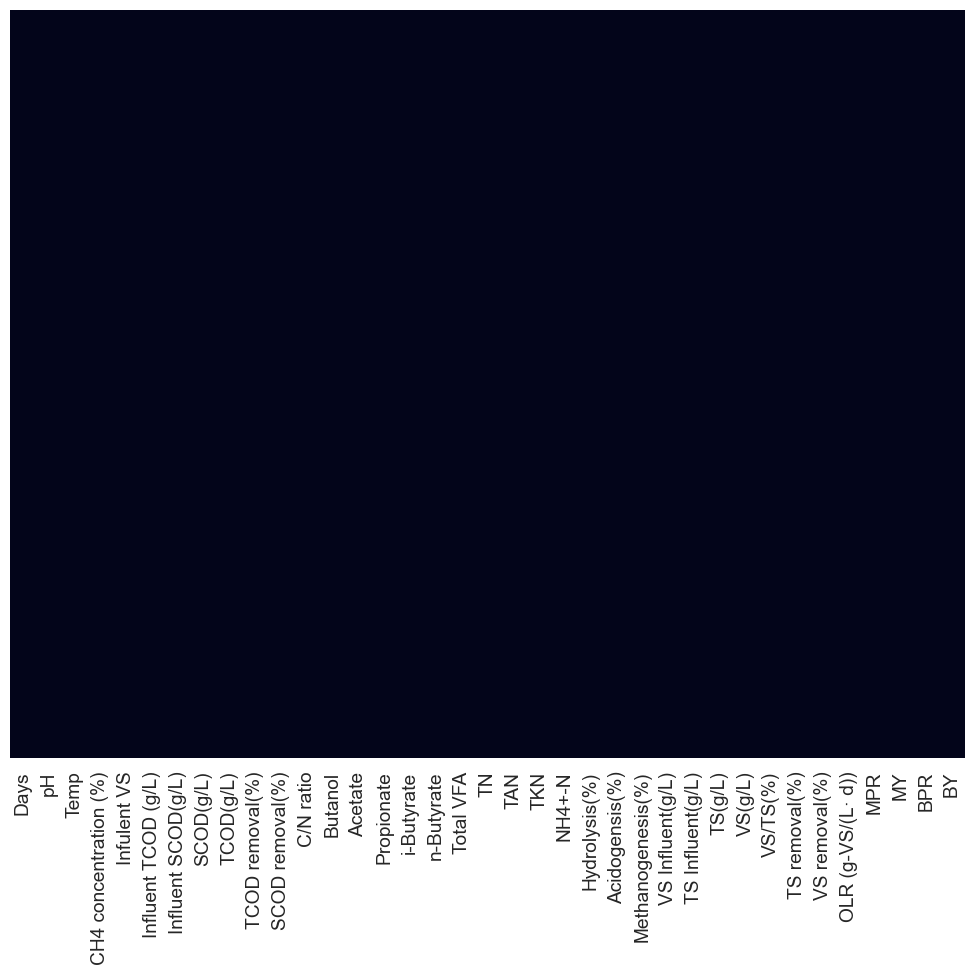

In [125]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train_dummy_data.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [126]:
#看數據維度
print(train_dummy_data.shape)
#看數據訊息
train_dummy_data.info()

(205, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Days                   205 non-null    int64
 1   pH                     205 non-null    int64
 2   Temp                   205 non-null    int64
 3   CH4 concentration (%)  205 non-null    int64
 4   Infulent VS            205 non-null    int64
 5   Influent TCOD (g/L)    205 non-null    int64
 6   Influent SCOD(g/L)     205 non-null    int64
 7   SCOD(g/L)              205 non-null    int64
 8   TCOD(g/L)              205 non-null    int64
 9   TCOD removal(%)        205 non-null    int64
 10  SCOD removal(%)        205 non-null    int64
 11  C/N ratio              205 non-null    int64
 12  Butanol                205 non-null    int64
 13  Acetate                205 non-null    int64
 14  Propionate             205 non-null    int64
 15  i-Butyrate             205 non

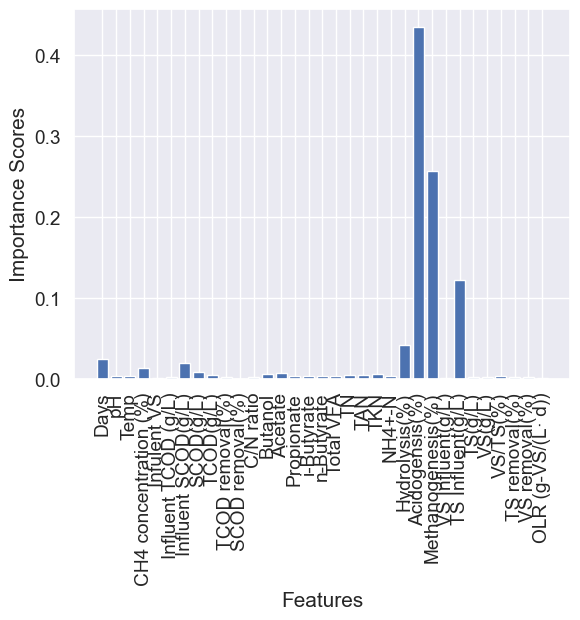

In [127]:
#隨機森林塞選變
from sklearn.ensemble import RandomForestRegressor

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

# 創建特徵和目標變量的數據集
X = train_dummy_data[features]
y = train_dummy_data[targets]

# 構建隨機森林模型
model = RandomForestRegressor(n_estimators=100)

# 訓練模型
model.fit(X, y)

# 提取變數重要性
importance_scores = model.feature_importances_

# 可視化變數重要性


plt.bar(features, importance_scores)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
plt.show()


In [128]:
# 將特徵名稱和重要性分數組成一個字典
importance_dict = dict(zip(features, importance_scores))

# 根據重要性分數進行排序
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# 提取前五個最重要的特徵變數
top_5_features = [feat for feat, _ in sorted_importance[:5]]

# 輸出前五個最重要的特徵變數
print("Top 5 most important features:")
for feature in top_5_features:
    print(feature)

Top 5 most important features:
Acidogensis(%)
Methanogenesis(%)
TS Influent(g/L)
Hydrolysis(%)
Days


In [ ]:
# # 確定目標變量和特徵變量
# targets = ["MPR", "MY", "BPR", "BY"]
# features = [col for col in train.columns if col not in targets]

In [ ]:
#熱圖查看數據相關性，數值越接近 1 或 -1 的變數對其相關性越高，0為無相關。
for target in targets :
    k = 10
    corrmat = train.corr()
    cols = corrmat.nlargest(k, target)[target].index
    cm = np.corrcoef(train[cols].values.T)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values)
    plt.title(f"Top {k} Correlations with {target}")
    plt.show()

In [130]:
# 將特徵進行數學轉換
train_dummy_data['Methanogenesis_Squared'] = np.square(train_dummy_data['Methanogenesis(%)']) #平方
train_dummy_data['Methanogenesis_SquareRoot'] = np.sqrt(train_dummy_data['Methanogenesis(%)']) #平方根
train_dummy_data['Methanogenesis_Log'] = np.log(train_dummy_data['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
train_dummy_data['Interaction_Meth_Hydro'] = train_dummy_data['Methanogenesis(%)'] * train_dummy_data['Hydrolysis(%)'] #平方
train_dummy_data['Sum_Meth_Hydro'] = train_dummy_data['Methanogenesis(%)'] + train_dummy_data['Hydrolysis(%)'] #平方根
train_dummy_data['Ratio_Meth_Hydro'] = train_dummy_data['Methanogenesis(%)'] / (train_dummy_data['Hydrolysis(%)'] + 1)  # 加1避免除以0

train_dummy_data.fillna(0, inplace=True)

# 檢查衍生特徵是否成功添加到數據集中
print(train_dummy_data.head())


   Days  pH  Temp  CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0     0   0     4                     12            0                    4   
1     3   3     4                     11            0                    4   
2     4   4     4                     10            0                    4   
3     5   5     4                     18            0                    4   
4     6   5     4                     11            0                    4   

   Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  TCOD removal(%)  SCOD removal(%)  \
0                   6        127        176                0                0   
1                   6        133        147                8                0   
2                   6        134        143               10                0   
3                   6        139        159                5                0   
4                   6        147        169                2                0   

   C/N ratio  Butanol  Acetate  Propionate  

In [ ]:
# #隨機森林塞選變
# from sklearn.ensemble import RandomForestRegressor

# # 準備特徵和目標變量
# features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#             'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#             'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#             'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#             'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#             'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#             'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

# targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

# # 創建特徵和目標變量的數據集
# X = test_dummy_data[features]
# y = test_dummy_data[targets]

# # 構建隨機森林模型
# model = RandomForestRegressor(n_estimators=100)

# # 訓練模型
# model.fit(X, y)

# # 提取變數重要性
# importance_scores = model.feature_importances_

# # 可視化變數重要性


# plt.bar(features, importance_scores)
# plt.xlabel('Features')
# plt.ylabel('Importance Scores')
# plt.xticks(rotation=90)
# plt.show()


In [132]:
# 將特徵進行數學轉換
test_dummy_data['Methanogenesis_Squared'] = np.square(test_dummy_data['Methanogenesis(%)']) #平方
test_dummy_data['Methanogenesis_SquareRoot'] = np.sqrt(test_dummy_data['Methanogenesis(%)']) #平方根
test_dummy_data['Methanogenesis_Log'] = np.log(test_dummy_data['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
test_dummy_data['Interaction_Meth_Hydro'] = test_dummy_data['Methanogenesis(%)'] * test_dummy_data['Hydrolysis(%)'] #平方
test_dummy_data['Sum_Meth_Hydro'] = test_dummy_data['Methanogenesis(%)'] + test_dummy_data['Hydrolysis(%)'] #平方根
test_dummy_data['Ratio_Meth_Hydro'] = test_dummy_data['Methanogenesis(%)'] / (test_dummy_data['Hydrolysis(%)'] + 1)  # 加1避免除以0

test_dummy_data.fillna(0, inplace=True)

# 檢查衍生特徵是否成功添加到數據集中
print(test_dummy_data.head())


       Days        pH      Temp  CH4 concentration (%)  Infulent VS  \
0 -1.752460 -4.636630  0.209731               0.269117    -0.560142   
1 -1.701903 -3.571634  0.209731               0.802150    -0.560142   
2 -1.685051 -4.104132  0.209731              -0.397175    -0.560142   
3 -1.668199 -3.571634  0.209731               0.668892    -0.560142   
4 -1.651347 -4.370381  0.209731              -0.397175    -0.560142   

   Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0            -1.022601           -0.377381   1.641573   1.772613   
1            -1.022601           -0.377381   1.621366   1.486694   
2            -1.022601           -0.377381   1.479919   1.182905   
3            -1.022601           -0.377381   1.459713   1.450954   
4            -1.022601           -0.377381   1.419299   1.558174   

   TCOD removal(%)  SCOD removal(%)  C/N ratio   Butanol   Acetate  \
0        -2.178456        -1.521510   1.768133 -0.749622 -0.562643   
1        -1.838280      

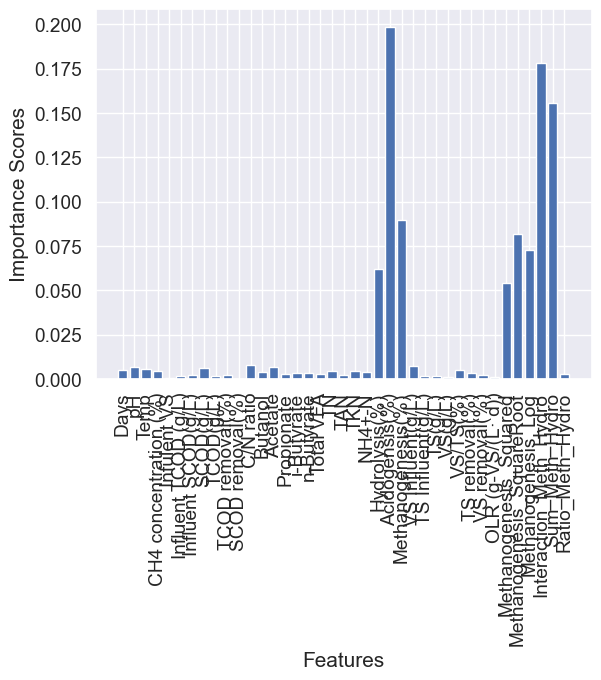

In [173]:
#隨機森林塞選變
from sklearn.ensemble import RandomForestRegressor

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro']

# targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量
targets = ['MPR'] 
# targets = ['MY']
# targets = ['BPR']
# targets = ['BY']

# 創建特徵和目標變量的數據集
X = train_dummy_data[features]
y = train_dummy_data[targets]

# 構建隨機森林模型
model = RandomForestRegressor(n_estimators=100)

# 訓練模型
model.fit(X, y)

# 提取變數重要性
importance_scores = model.feature_importances_

# 可視化變數重要性


plt.bar(features, importance_scores)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
plt.show()


In [174]:
#迭代特徵選擇
from sklearn.feature_selection import RFE

model = RandomForestRegressor(n_estimators=100)

rfe = RFE(estimator=model, n_features_to_select=10)  # 選擇保留的特徵數量

X_selected = rfe.fit_transform(X, y)

selected_feature_indexes = rfe.get_support(indices=True)

selected_features = [features[idx] for idx in selected_feature_indexes]

print("使用遞歸特徵消除 (RFE) 選擇特徵:")
print(selected_features)


使用遞歸特徵消除 (RFE) 選擇特徵:
['Days', 'Acetate', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)', 'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log', 'Interaction_Meth_Hydro', 'Sum_Meth_Hydro']


In [175]:
X_selected = train_dummy_data[selected_features]

y_selected = train_dummy_data[targets]

model.fit(X_selected, y_selected)

RandomForestRegressor()

In [176]:
#導入
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb
import lightgbm as lgb


In [177]:
# 交叉驗證
n_folds = 5

# RMSE
def rmsle_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model, X.values, y.values, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# MAE
def mae_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    mae = -cross_val_score(model, X.values, y.values, scoring="neg_mean_absolute_error", cv=kf)
    return mae



In [178]:
#Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005,random_state=1))

#Lasso MAE得分
score_mae = mae_cv(lasso, X_selected, y_selected)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

#Lasso RMSE得分
score = rmsle_cv(lasso, X_selected, y_selected)
print("\nLsso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso MAE score: 3.8105 (1.3387)


Lsso score: 5.4872 (1.8385)



In [179]:
#ENet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#ENet MAE得分
score_mae = mae_cv(ENet, X_selected, y_selected)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

#ENet RMSE得分
score = rmsle_cv(ENet, X_selected, y_selected)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso MAE score: 3.8077 (1.3416)

ElasticNet score: 5.4832 (1.8410)



In [180]:
#KRR
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)

#KRR MAE得分
score_mae = mae_cv(KRR, X_selected, y_selected)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

#KRR RMSE得分
score = rmsle_cv(KRR, X_selected, y_selected)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso MAE score: 6.9497 (3.4902)

Kernel Ridge score: 9.2008 (4.2619)



In [181]:
#梯度提升
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)
# 樹的數量（n_estimators）
# 學習率（learning_rate）
# 樹的最大深度（max_depth）
# 特徵的最大數量（max_features）
# 每個葉子節點最小樣本數（min_samples_leaf）
# 節點分裂所需最小樣本數（min_samples_split）
# 損失函數（loss）

#GBoost MAE得分
score_mae = mae_cv(GBoost, X_selected, y_selected)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

#GBoost RMSE得分
score = rmsle_cv(GBoost, X_selected, y_selected)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso MAE score: 5.3738 (1.3794)

Gradient Boosting score: 7.1541 (2.1223)



In [192]:
warnings.filterwarnings("ignore", category=UserWarning)
#XGB
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817,n_estimators=2200,
                             subsample=0.5213,silent=1,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             random_state=7, nthread=-1)
# colsamples_bytree 是列的採樣率
# gamma 是節點劃分所需的最小損失減少值
# learning_rate 是每次迭代的步長大小
# max_depth 是樹的最大深度
# min_child_weight 是子節點所需最小樣本數
# n_estimators 是樹的數量
# subsample 是行的採樣率
# reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
# random_state 是隨機種子
# nthread 是 CPU 的使用數量

#XGBoost MAE得分
score_mae = mae_cv(model_xgb, X_selected, y_selected)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

#XGB RMSE得分
score = rmsle_cv(model_xgb, X_selected, y_selected)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[11:05:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[11:05:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[11:05:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[11:05:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[11:05:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.


Lasso MAE score: 4.

In [184]:
#lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#LightGB MAE得分
score_mae = mae_cv(model_lgb, X_selected, y_selected)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

#LightGB RMSE得分
score = rmsle_cv(model_lgb, X_selected, y_selected)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11